標高データの取得

In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("/Users/chidayasuhiro/diveintocode-ml/mtfuji_data.csv", delimiter=",", skiprows=1)

【問題1】データの可視化

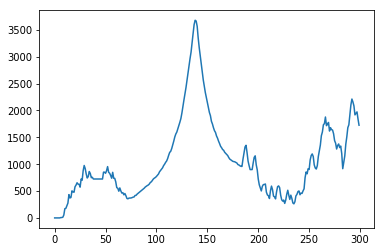

In [3]:
import matplotlib.pyplot as plt

fuji0=fuji[:,0] #番号
fuji1=fuji[:,1] #緯度
fuji2=fuji[:,2] #経度
fuji3=fuji[:,3] #標高
fuji4=fuji[:,4] #地点0からの距離

plt.plot(fuji0,fuji3)
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

In [5]:
# 関数名がchida
# 入力値を標高のデータhyoko 地点point 今いる地点の番号number
# 出力値が「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配koubai
# 例として278地点と277地点の関係の勾配を表示

def chida(hyoko,point,number):
    hyoko1=hyoko[1:len(hyoko)]
    hyoko2=hyoko[0:len(hyoko)-1]
    hyoko3=hyoko1-hyoko2
    
    point1=point[1:len(point)]
    point2=point[0:len(point)-1]
    point3=point1-point2
    
    koubai=hyoko3/point3
       
    return koubai[number]

chida(fuji3,fuji0,278)

27.470000000000027

【問題3】移動先の地点を計算する関数を作成

In [18]:
# 移動先の地点 = 今いる地点 - α ×今いる地点の勾配の関数を制作
# 入力値は今いる地点point1 hpがハイパーパラメータ　今いる地点の勾配をkoubai1
# 出力は　移動先の地点point2
# 関数名はchida2

def chida2(point1,hp,koubai1):
    point11=point1-hp*koubai1
    point2=round(point11)
    return point2

In [23]:
# 問題２で関数を使ってみる αは0.2で計算

def chida(hyoko,point,number):
    hyoko1=hyoko[1:len(hyoko)]
    hyoko2=hyoko[0:len(hyoko)-1]
    hyoko3=hyoko1-hyoko2
    
    point1=point[1:len(point)]
    point2=point[0:len(point)-1]
    point3=point1-point2
    
    koubai=hyoko3/point3
       
    return koubai[number]

def chida2(point1,hp,koubai1):
    point11=point1-hp*koubai1
    point2=int(point11)
    return point2

chida11=chida(fuji3,fuji0,278)
chida2(278,0.2,chida11)

272

【問題4】山を下る関数を作成

In [28]:
# 136で下山をしていく
# 移動先の地点＝今いる地点まで続けるが無限にループしてしまうのでループ回数は２０回で行う
# 生成されたリストを見たところ地点69~76で永遠にループしている

def chida(hyoko,point,point_a,hp):
    hyoko1=hyoko[1:len(hyoko)]
    hyoko2=hyoko[0:len(hyoko)-1]
    hyoko3=hyoko1-hyoko2
    
    point1=point[1:len(point)]
    point2=point[0:len(point)-1]
    point3=point1-point2
    
    koubai=hyoko3/point3

    koubai1=koubai[point_a]
    point_list=[int(point_a)]
    for i in range(20):
        point_new=point_a-hp*koubai1
        point_new1=int(point_new)
        point_list.append(point_new1)
        koubai1=koubai[point_new1]
        point_a=point_new1        
    return point_list

chida(fuji3,fuji0,136,0.2)

[136,
 102,
 93,
 87,
 83,
 79,
 78,
 72,
 69,
 77,
 76,
 74,
 73,
 72,
 69,
 77,
 76,
 74,
 73,
 72,
 69]

【問題5】下山過程の可視化

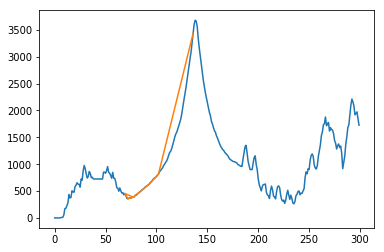

In [50]:
chida_sample=chida(fuji3,fuji0,136,0.2)
chida_sample=chida_sample[0:10]
list_1=[fuji[chida_sample[n],3] for n in range(len(chida_sample))]

plt.plot(fuji0,fuji3)
plt.plot(chida_sample,list_1)
plt.show()

【問題6】初期値の変更

In [35]:
#　【問題４】ですでに初期値を任意で選択できる関数を作成した
#  point_aが初期値となる

def chida(hyoko,point,point_a,hp):
    hyoko1=hyoko[1:len(hyoko)]
    hyoko2=hyoko[0:len(hyoko)-1]
    hyoko3=hyoko1-hyoko2
    
    point1=point[1:len(point)]
    point2=point[0:len(point)-1]
    point3=point1-point2
    
    koubai=hyoko3/point3

    koubai1=koubai[point_a]
    point_list=[int(point_a)]
    for i in range(20):
        point_new=point_a-hp*koubai1
        point_new1=int(point_new)
        point_list.append(point_new1)
        koubai1=koubai[point_new1]
        point_a=point_new1        
    return point_list

【問題7】初期値ごとの下山過程の可視化

In [32]:
#  初期値が地点146の場合
chida146=chida(fuji3,fuji0,146,0.2)
chida146

[146,
 169,
 173,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175,
 175]

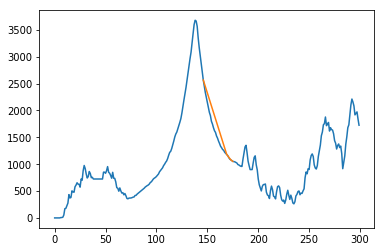

In [49]:
# 初期値が地点146の場合の作図
chida_sample=chida(fuji3,fuji0,146,0.2)
chida_sample=chida_sample[0:10]
list_1=[fuji[chida_sample[n],3] for n in range(len(chida_sample))]

plt.plot(fuji0,fuji3)
plt.plot(chida_sample,list_1)
plt.show()

In [60]:
#  初期値が地点30の場合
chida250=chida(fuji3,fuji0,30,0.2)
chida250

[30,
 50,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40]

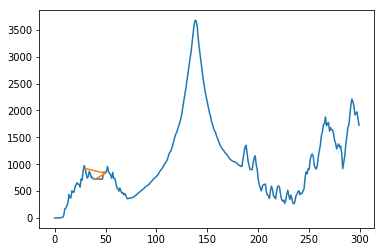

In [61]:
#　初期値が地点30の場合の作図
chida_sample=chida(fuji3,fuji0,30,0.2)
chida_sample=chida_sample[0:10]
list_1=[fuji[chida_sample[n],3] for n in range(len(chida_sample))]

plt.plot(fuji0,fuji3)
plt.plot(chida_sample,list_1)
plt.show()

【問題8】（アドバンス問題）ハイパーパラメータの変更

In [63]:
# ハイパーパラメータを0.5とする
# 136で下山をしていく

def chida(hyoko,point,point_a,hp):
    hyoko1=hyoko[1:len(hyoko)]
    hyoko2=hyoko[0:len(hyoko)-1]
    hyoko3=hyoko1-hyoko2
    
    point1=point[1:len(point)]
    point2=point[0:len(point)-1]
    point3=point1-point2
    
    koubai=hyoko3/point3

    koubai1=koubai[point_a]
    point_list=[int(point_a)]
    for i in range(20):
        point_new=point_a-hp*koubai1
        point_new1=int(point_new)
        point_list.append(point_new1)
        koubai1=koubai[point_new1]
        point_a=point_new1        
    return point_list

chida136=chida(fuji3,fuji0,136,0.5)
chida136

[136,
 53,
 61,
 66,
 62,
 89,
 82,
 75,
 71,
 74,
 73,
 71,
 74,
 73,
 71,
 74,
 73,
 71,
 74,
 73,
 71]

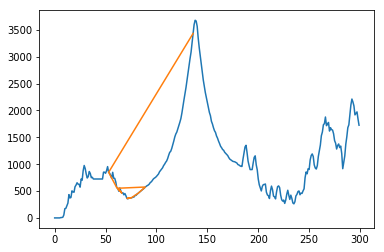

In [65]:
chida136=chida(fuji3,fuji0,136,0.5)
chida_sample=chida136[0:10]
list_1=[fuji[chida_sample[n],3] for n in range(len(chida_sample))]

plt.plot(fuji0,fuji3)
plt.plot(chida_sample,list_1)
plt.show()

＜考察＞　ハイパーパラメータを0.2から0.5にしたことで問題５と比較して下山のパターンが大きく変わったことがわかる